# Sentiment Analysis of movie reviews
## First algorithm: Multinomial Naive Bayes

In [1]:
# Importing pandas library
import pandas as pd
# Importing numpy library
import numpy as np
# Importing matplotlib library to plot graphs
import matplotlib.pyplot as plt

In [2]:
# Importing train dataset
train_df = pd.read_csv('reviews_train.csv')

# Displaying first 5 entries of the dataframe 
train_df.head(5)

,review,sentiment
0,Bromwell High is a cartoon comedy. It ran at t...,positive
1,Homelessness (or Houselessness as George Carli...,positive
2,Brilliant over-acting by Lesley Ann Warren. Be...,positive
3,This is easily the most underrated film inn th...,positive
4,This is not the typical Mel Brooks film. It wa...,positive


In [3]:
# Shape of the dataframe
train_df.shape

(25000, 2)

In [4]:
# Checking if the dataframe contains any null values
train_df.isnull().sum()

review       0
sentiment    0
dtype: int64

In [5]:
# Checking the unique values of sentiment column
train_df['sentiment'].unique()

array(['positive', 'negative'], dtype=object)

In [6]:
# Changing the postive sentiment to 1, and negative sentiment to 0
train_df['sentiment'] = train_df['sentiment'].map({'positive': 1, 'negative': 0})
train_df.head(5)

,review,sentiment
0,Bromwell High is a cartoon comedy. It ran at t...,1
1,Homelessness (or Houselessness as George Carli...,1
2,Brilliant over-acting by Lesley Ann Warren. Be...,1
3,This is easily the most underrated film inn th...,1
4,This is not the typical Mel Brooks film. It wa...,1


In [7]:
# Displaying the last 5 entries 
train_df.tail(5)

,review,sentiment
24995,"Towards the end of the movie, I felt it was to...",0
24996,This is the kind of movie that my enemies cont...,0
24997,I saw 'Descent' last night at the Stockholm Fi...,0
24998,Some films that you pick up for a pound turn o...,0
24999,"This is one of the dumbest films, I've ever se...",0


In [8]:
# Convert reviews to lowercase
train_df['review'] = train_df['review'].str.lower()

In [9]:
# Removing HTML elements from the reviews
train_df['review'] = train_df['review'].str.replace(r'<.*?>', '', regex=True)

# Removing extra spaces from the reviews
train_df['review'] = train_df['review'].str.replace(r'\s+', ' ', regex=True)

In [10]:
# Displaying 11th value of the dataframe
train_df['review'][10]

'when i first read armistead maupins story i was taken in by the human drama displayed by gabriel no one and those he cares about and loves. that being said, we have now been given the film version of an excellent story and are expected to see past the gloss of hollywood...writer armistead maupin and director patrick stettner have truly succeeded! with just the right amount of restraint robin williams captures the fragile essence of gabriel and lets us see his struggle with issues of trust both in his personnel life(jess) and the world around him(donna).as we are introduced to the players in this drama we are reminded that nothing is ever as it seems and that the smallest event can change our lives irrevocably. the request to review a book written by a young man turns into a life changing event that helps gabriel find the strength within himself to carry on and move forward.it\'s to bad that most people will avoid this film. i only say that because the average american will probably th

In [11]:
# Separating columns to X and y
X = train_df['review']
y = train_df['sentiment']

In [12]:
# Separating columns to X and y to train
X_train = train_df['review']
y_train = train_df['sentiment']

In [13]:
# Importing test dataset 
test_df = pd.read_csv('reviews_test.csv')
test_df.head(5)

,review,sentiment
0,I went and saw this movie last night after bei...,positive
1,Actor turned director Bill Paxton follows up h...,positive
2,As a recreational golfer with some knowledge o...,positive
3,"I saw this film in a sneak preview, and it is ...",positive
4,Bill Paxton has taken the true story of the 19...,positive


In [14]:
# Displaying the shape of the dataframe
test_df.shape

(25000, 2)

In [15]:
# Checking if the dataframe contains any null values
test_df.isnull().sum()

review       0
sentiment    0
dtype: int64

In [16]:
# Checking the unique values of sentiment column
test_df['sentiment'].unique()

array(['positive', 'negative'], dtype=object)

In [17]:
# Changing the postive sentiment to 1, and negative sentiment to 0
test_df['sentiment'] = test_df['sentiment'].map({'positive': 1, 'negative': 0})
test_df.head(5)

,review,sentiment
0,I went and saw this movie last night after bei...,1
1,Actor turned director Bill Paxton follows up h...,1
2,As a recreational golfer with some knowledge o...,1
3,"I saw this film in a sneak preview, and it is ...",1
4,Bill Paxton has taken the true story of the 19...,1


In [18]:
test_df.tail(5)

,review,sentiment
24995,I occasionally let my kids watch this garbage ...,0
24996,When all we have anymore is pretty much realit...,0
24997,The basic genre is a thriller intercut with an...,0
24998,Four things intrigued me as to this film - fir...,0
24999,David Bryce's comments nearby are exceptionall...,0


In [19]:
# Convert reviews to lowercase
test_df['review'] = test_df['review'].str.lower()

In [20]:
# Removing HTML elements from the reviews
test_df['review'] = test_df['review'].str.replace(r'<.*?>', '', regex=True)

# Removing extra spaces from the reviews
test_df['review'] = test_df['review'].str.replace(r'\s+', ' ', regex=True)

In [21]:
# Displaying 11th entry of the dataframe
test_df['review'][10]

"i loved this movie from beginning to end.i am a musician and i let drugs get in the way of my some of the things i used to love(skateboarding,drawing) but my friends were always there for me.music was like my rehab,life support,and my drug.it changed my life.i can totally relate to this movie and i wish there was more i could say.this movie left me speechless to be honest.i just saw it on the ifc channel.i usually hate having satellite but this was a perk of having satellite.the ifc channel shows some really great movies and without it i never would have found this movie.im not a big fan of the international films because i find that a lot of the don't do a very good job on translating lines.i mean the obvious language barrier leaves you to just believe thats what they are saying but its not that big of a deal i guess.i almost never got to see this amazing movie.good thing i stayed up for it instead of going to bed..well earlier than usual.lol.i hope you all enjoy the hell of this mov

In [22]:
# Separating the data for testing
X_test = test_df["review"]
y_test = test_df["sentiment"]

In [23]:
# importing TF-IDF vectorizer to convert text to numerical value
from sklearn.feature_extraction.text import TfidfVectorizer

In [24]:
# Creating the TF-IDF vectorizer 
tf = TfidfVectorizer(stop_words='english', max_features=5000)

In [25]:
# Using the TF-IDF vectorizer in X_train data
X_train_tfidf = tf.fit_transform(X_train)

# Using the TF-IDF vectorizer in X_test data
X_test_tfidf = tf.transform(X_test)

In [26]:
# Importing MultinomialNB from scikit learn
from sklearn.naive_bayes import MultinomialNB
# Importing performance metrics
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score

# Creating the MultinomialNB model object
naive_model = MultinomialNB()

In [27]:
# Fitting the model with train and test data
naive_model.fit(X_train_tfidf, y_train)

MultinomialNB()

In [28]:
# Predicting the output using X_test_tfidf
naive_pred = naive_model.predict(X_test_tfidf)

In [29]:
# Calculating the accuracy score of this model
print(f"Naive Bayes Accuracy: {(accuracy_score(y_test, naive_pred) * 100):.2f}%")

Naive Bayes Accuracy: 83.90%


In [30]:
# Calculating the confusion matrix for check correct and incorrect predictions
c_matrix = confusion_matrix(y_test, naive_pred)
print(f"Confusion Matrix:\n {c_matrix}")

Confusion Matrix:
 [[10705  1795]
 [ 2230 10270]]


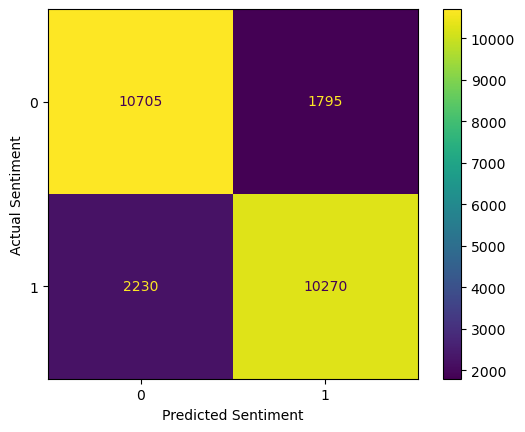

In [31]:
from sklearn.metrics import ConfusionMatrixDisplay

# Displaying the confusion matrix in a heatmap
ConfusionMatrixDisplay.from_predictions(y_test, naive_pred, values_format='d')

plt.xlabel("Predicted Sentiment")
plt.ylabel("Actual Sentiment")
plt.show()

In [32]:
# Classification Report of Naive Bayes Model
print("\nClassification Report (Naive Bayes):")
print(classification_report(y_test, naive_pred))


Classification Report (Naive Bayes):
              precision    recall  f1-score   support

           0       0.83      0.86      0.84     12500
           1       0.85      0.82      0.84     12500

    accuracy                           0.84     25000
   macro avg       0.84      0.84      0.84     25000
weighted avg       0.84      0.84      0.84     25000



## Second Algorithm: Logistic Regression

In [33]:
# Importing LinearRegression to train Linear Regression model
from sklearn.linear_model import LogisticRegression

# Creating linear regression model object with maximum iteration being 1000
lr_model = LogisticRegression(max_iter=1000)

In [34]:
# Fitting the model with X_train_tfidf and y_train data
lr_model.fit(X_train_tfidf, y_train)

LogisticRegression(max_iter=1000)

In [35]:
# Predicting the output using X_test_tfidf
lr_pred = lr_model.predict(X_test_tfidf)

In [36]:
# Displaying the accuracy of the Logistic Regression model
print(f"Logistic Regression Accuracy: {accuracy_score(y_test, lr_pred) * 100}%")

Logistic Regression Accuracy: 87.9%


In [37]:
# Calculating the confusion matrix for check correct and incorrect predictions
c_matrix = confusion_matrix(y_test, lr_pred)

print(f"Confusion Matrix:\n {c_matrix}")

Confusion Matrix:
 [[10926  1574]
 [ 1451 11049]]


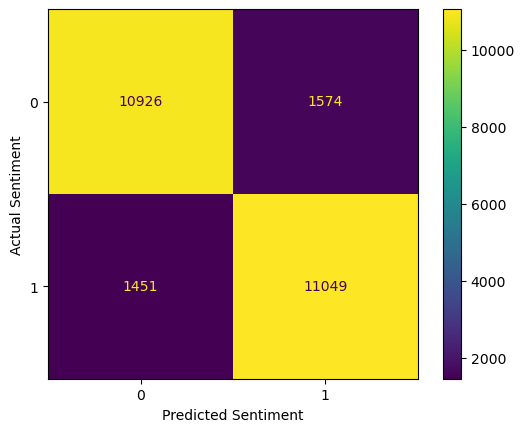

In [38]:
# Displaying the confusion matrix in a heatmap
ConfusionMatrixDisplay.from_predictions(y_test, lr_pred, values_format='d')

plt.xlabel("Predicted Sentiment")
plt.ylabel("Actual Sentiment")
plt.show()

In [39]:
# Displaying the classification report of this model
print("Classification Report (Logistic Regression):")
print(classification_report(y_test, lr_pred))

Classification Report (Logistic Regression):
              precision    recall  f1-score   support

           0       0.88      0.87      0.88     12500
           1       0.88      0.88      0.88     12500

    accuracy                           0.88     25000
   macro avg       0.88      0.88      0.88     25000
weighted avg       0.88      0.88      0.88     25000



## Ensemble Model of Logistic Regression and Multinomial Naive Bayes

In [40]:
# Importing voting classifer from scikit learn
from sklearn.ensemble import VotingClassifier

In [41]:
# Creating a Voting Classifier Model using logistic regression and naive bayes
ensemble_model = VotingClassifier(
    estimators = [
        ('logistic_regression', LogisticRegression()),
        ('naive_bayes', MultinomialNB())
    ], voting='soft'
)

# Fitting the voting model with train data
ensemble_model.fit(X_train_tfidf, y_train)

VotingClassifier(estimators=[('logistic_regression', LogisticRegression()),
                             ('naive_bayes', MultinomialNB())],
                 voting='soft')

In [42]:
# Predicting output using voting classifier
ensemble_pred = ensemble_model.predict(X_test_tfidf)

In [43]:
# Displaying ensemble model accuracy
print(f"Emsemble Model Accuracy: {(accuracy_score(y_test, ensemble_pred) * 100):.2f}%")

Emsemble Model Accuracy: 87.39%


In [44]:
# Calculating Confusion Matrix
c_matrix = confusion_matrix(y_test, ensemble_pred)
print(f"Confusion Matrix:\n {c_matrix}")

Confusion Matrix:
 [[10947  1553]
 [ 1600 10900]]


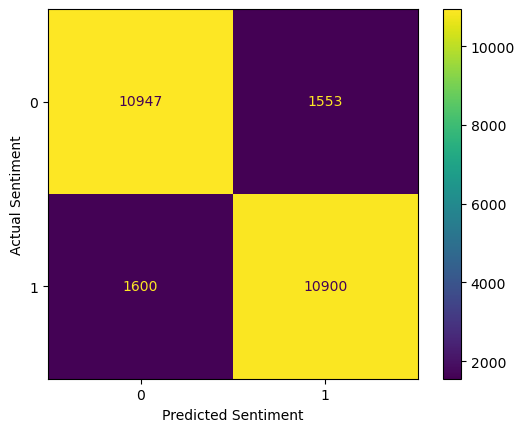

In [45]:
# Plot confusion matrix
ConfusionMatrixDisplay.from_predictions(y_test, ensemble_pred, values_format='d')
plt.xlabel("Predicted Sentiment")
plt.ylabel("Actual Sentiment")
plt.show()

In [46]:
# Displaying Classification report of ensemble model
print("Classification Report (Ensemble Model):")
print(classification_report(y_test, ensemble_pred))

Classification Report (Ensemble Model):
              precision    recall  f1-score   support

           0       0.87      0.88      0.87     12500
           1       0.88      0.87      0.87     12500

    accuracy                           0.87     25000
   macro avg       0.87      0.87      0.87     25000
weighted avg       0.87      0.87      0.87     25000



## Third Algorithm: LSTM

In [47]:
# Importing tensorflow library
import tensorflow as tf

# Importing Sequential model from tensorflow
from tensorflow.keras.models import Sequential
# Importing Dense, LSTM, Embedding, and Input layers
from tensorflow.keras.layers import Dense, LSTM, Embedding, Input
# Importing Tokenizer tto convert text into integers
from tensorflow.keras.preprocessing.text import Tokenizer
# Importing pad_sequences to pad sequences to the same length
from tensorflow.keras.preprocessing.sequence import pad_sequences

E:\Anaconda\Lib\site-packages\keras\src\export\tf2onnx_lib.py:8: FutureWarning: In the future `np.object` will be defined as the corresponding NumPy scalar.
  if not hasattr(np, "object"):


In [48]:
# importing train test split to convert data to train data and test data for hyperparameter tuning
from sklearn.model_selection import train_test_split

# using the train test split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [49]:
# Mapping integers to words
tokenizer = Tokenizer(num_words=10000, oov_token="<OOV>")
tokenizer.fit_on_texts(X_train)

In [50]:
# Converting to integers
X_train_sequences = tokenizer.texts_to_sequences(X_train)
X_test_sequences = tokenizer.texts_to_sequences(X_test)

In [51]:
# Padding sequences to same length which is 120
X_train_pad = pad_sequences(X_train_sequences, maxlen=120, padding="post")
X_test_pad = pad_sequences(X_test_sequences, maxlen=120, padding="post")

In [52]:
# Converting data to numpy arrays of type int32
X_train = np.array(X_train_pad.tolist(), dtype='int32')
X_test = np.array(X_test_pad.tolist(), dtype='int32')

y_train = np.array(y_train, dtype='int32')
y_test = np.array(y_test, dtype='int32')

In [53]:
# Building LSTM Model with 128 LSTM units
lstm_model = Sequential([
    Input(shape=(120,)),
    Embedding(input_dim=10000, output_dim=100),
    LSTM(128),
    Dense(1, activation='sigmoid')
])

# Compiling the LSTM Model
lstm_model.compile(loss='binary_crossentropy', optimizer='adam',metrics=['accuracy'])

In [54]:
# Fitting the LSTM model with train data, epoch = 10, batch size = 64, and 0.2 validation split
history = lstm_model.fit(
    X_train,
    y_train,
    epochs=10,
    batch_size=128,
    validation_split=0.2
)

Epoch 1/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 20s 147ms/step - accuracy: 0.7151 - loss: 0.5347 - val_accuracy: 0.8415 - val_loss: 0.3747
Epoch 2/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 18s 142ms/step - accuracy: 0.8554 - loss: 0.3658 - val_accuracy: 0.8035 - val_loss: 0.4682
Epoch 3/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 18s 141ms/step - accuracy: 0.8864 - loss: 0.3046 - val_accuracy: 0.8512 - val_loss: 0.3835
Epoch 4/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 18s 144ms/step - accuracy: 0.9198 - loss: 0.2248 - val_accuracy: 0.8482 - val_loss: 0.3900
Epoch 5/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 18s 142ms/step - accuracy: 0.9448 - loss: 0.1703 - val_accuracy: 0.8435 - val_loss: 0.4255
Epoch 6/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 18s 142ms/step - accuracy: 0.9609 - loss: 0.1296 - val_accuracy: 0.8365 - val_loss: 0.4783
Epoch 7/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 18s 143ms/step - accuracy: 0.9644 - loss: 0.1136 - val_accuracy: 0.8163 - val_loss: 0.5163
Epoch 8/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 18s 141ms/step - accuracy: 0.9393 - loss: 0

In [55]:
# Calculating the accuracy and loss on 5000 test data
loss, accuracy = lstm_model.evaluate(X_test, y_test)
print(f"Accuracy: {(accuracy * 100):.2f}")
print(f"Loss: {(loss * 100):.2f}")

157/157 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - accuracy: 0.8388 - loss: 0.6069
Accuracy: 83.88
Loss: 60.69


In [56]:
# Splitting data to X_test and y_test
X_test = test_df['review']
y_test = test_df['sentiment']

In [57]:
# Creating sequences
X_test_sequences = tokenizer.texts_to_sequences(X_test)

In [58]:
# Padding the sequences to same length
X_test_pad = pad_sequences(X_test_sequences, maxlen=120, padding="post")

In [59]:
# Calculating the accuracy and loss on 25000 test data
loss, accuracy = lstm_model.evaluate(X_test_pad, y_test)
print(f"Test Accuracy: {(accuracy * 100):.2f}")
print(f"Test Loss: {(loss * 100):.2f}")

782/782 ━━━━━━━━━━━━━━━━━━━━ 17s 21ms/step - accuracy: 0.8308 - loss: 0.6264
Test Accuracy: 83.08
Test Loss: 62.64


In [60]:
# Predict for test data, then convert to binary labels
lstm_pred = (lstm_model.predict(X_test_pad, batch_size=64) > 0.5).astype(int)
c_matrix = confusion_matrix(y_test, lstm_pred)
c_matrix

391/391 ━━━━━━━━━━━━━━━━━━━━ 12s 30ms/step


array([[10044,  2456],
       [ 1775, 10725]])

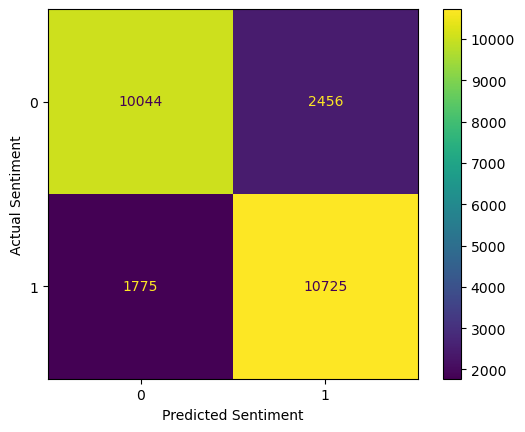

In [61]:
# Displaying the confusion matrix in a heatmap
ConfusionMatrixDisplay.from_predictions(y_test, lstm_pred, values_format='d')

plt.xlabel("Predicted Sentiment")
plt.ylabel("Actual Sentiment")
plt.show()

In [62]:
# Displaying Classification report of logistic regression
print("Classification Report (LSTM):")
print(classification_report(y_test, lstm_pred))

Classification Report (LSTM):
              precision    recall  f1-score   support

           0       0.85      0.80      0.83     12500
           1       0.81      0.86      0.84     12500

    accuracy                           0.83     25000
   macro avg       0.83      0.83      0.83     25000
weighted avg       0.83      0.83      0.83     25000



## Comparision of all models

In [63]:
# Calculating the accuracy, precision, recall, and f1-score of naive bayes model
nb_accuracy = accuracy_score(y_test, naive_pred)
nb_precision = precision_score(y_test, naive_pred)
nb_recall = recall_score(y_test, naive_pred)
nb_f1 = f1_score(y_test, naive_pred)

In [64]:
# Calculating the accuracy, precision, recall, and f1-score of logistic regression model
lr_accuracy = accuracy_score(y_test, lr_pred)
lr_precision = precision_score(y_test, lr_pred)
lr_recall = recall_score(y_test, lr_pred)
lr_f1 = f1_score(y_test, lr_pred)

In [65]:
# Calculating the accuracy, precision, recall, and f1-score of LSTM model
lstm_accuracy = accuracy_score(y_test, lstm_pred)
lstm_precision = precision_score(y_test, lstm_pred)
lstm_recall = recall_score(y_test, lstm_pred)
lstm_f1 = f1_score(y_test, lstm_pred)

In [66]:
# Calculating the accuracy, precision, recall, and f1-score of ensemble model
ensemble_accuracy = accuracy_score(y_test, ensemble_pred)
ensemble_precision = precision_score(y_test, ensemble_pred)
ensemble_recall = recall_score(y_test, ensemble_pred)
ensemble_f1 = f1_score(y_test, ensemble_pred)

In [67]:
# Creating lists of accuracy, precision, recall and f1-score
models_accuracy = [nb_accuracy, lr_accuracy, lstm_accuracy, ensemble_accuracy]
models_precision = [nb_precision, lr_precision, lstm_precision, ensemble_precision]
models_recall = [nb_recall, lr_recall, lstm_recall, ensemble_recall]
models_f1 = [nb_f1, lr_f1, lstm_f1, ensemble_f1]

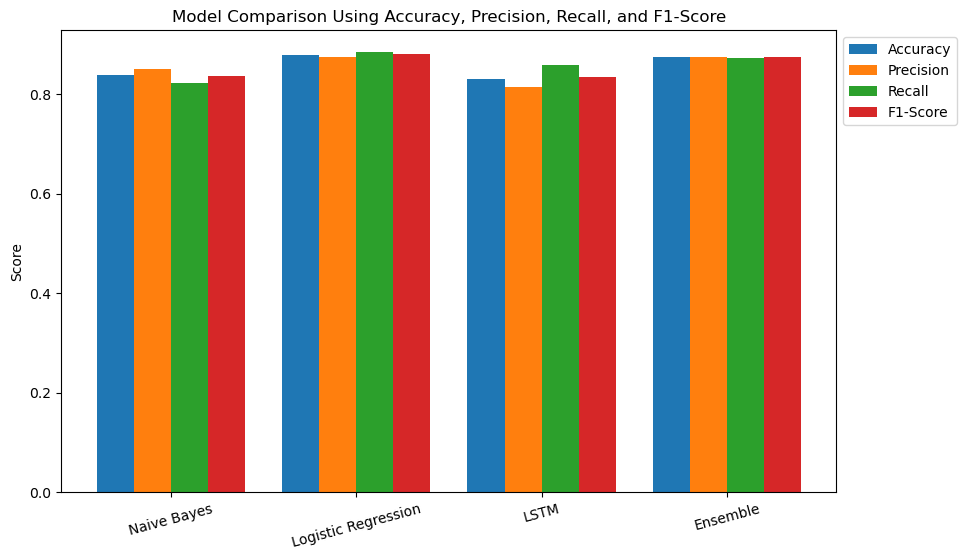

In [68]:
# Model names for labels in graph
models = ["Naive Bayes", "Logistic Regression", "LSTM", "Ensemble"]

x = np.arange(len(models))

# Plotting figure for bar graph
plt.figure(figsize=(10, 6))
plt.bar(x - 0.3, models_accuracy, 0.2, label="Accuracy")
plt.bar(x - 0.1, models_precision, 0.2, label="Precision")
plt.bar(x + 0.1, models_recall, 0.2, label="Recall")
plt.bar(x + 0.3, models_f1, 0.2, label="F1-Score")

# Labels, titles and legend of figure
plt.xticks(x, models, rotation=15)
plt.ylabel("Score")
plt.title("Model Comparison Using Accuracy, Precision, Recall, and F1-Score")
plt.legend(bbox_to_anchor=(1, 1))
plt.show()